In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"/home/akash/Downloads/NSE-Tata_Global_Beverages_Limited.csv")

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


<Axes: >

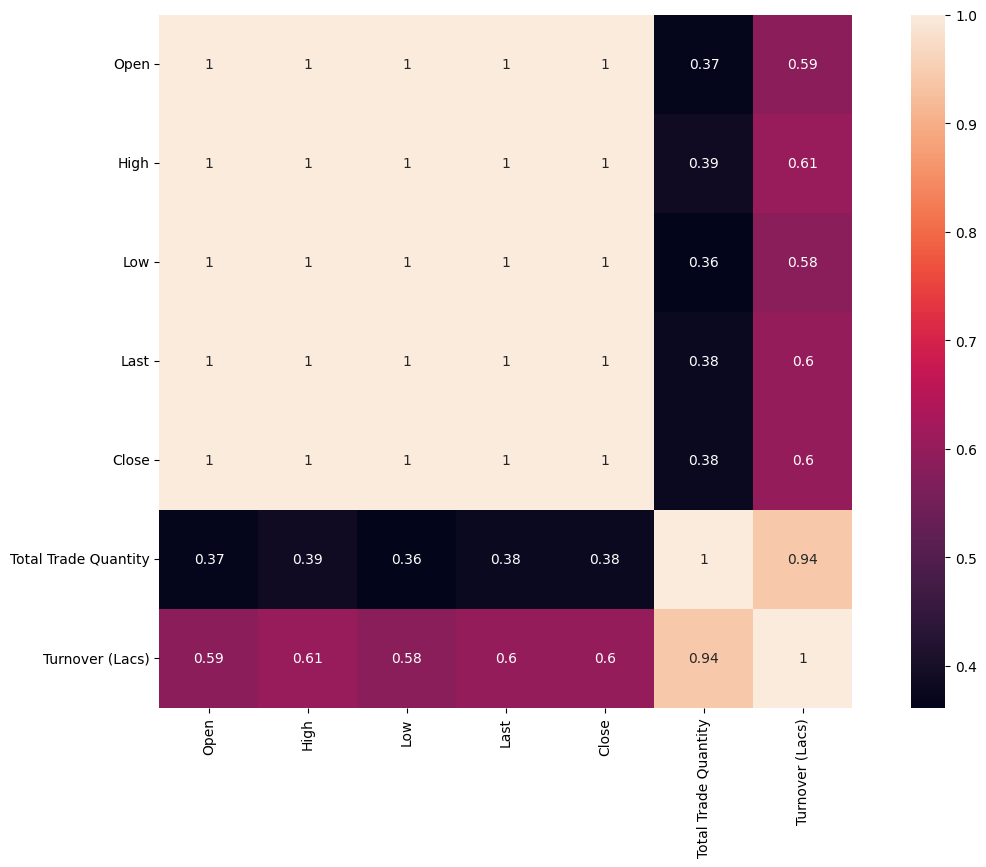

In [4]:
plt.subplots(figsize=(15,9))
sns.heatmap(df.corr(numeric_only=True),square=True,annot=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [6]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['date_ordinal'] = df['Date'].map(lambda x: x.toordinal())

In [11]:
y = df['Close']
x = df[['Open', 'High', 'Low', 'Last', 'Total Trade Quantity', 'Turnover (Lacs)', 'date_ordinal']]

In [12]:
x

,Open,High,Low,Last,Total Trade Quantity,Turnover (Lacs),date_ordinal
0,208.00,222.25,206.85,216.00,4642146.0,10062.83,736975
1,217.00,218.60,205.90,210.25,3519515.0,7407.06,736972
2,223.50,227.80,216.15,217.25,1728786.0,3815.79,736971
3,230.00,237.50,225.75,226.45,1708590.0,3960.27,736970
4,234.55,234.60,221.05,230.30,1534749.0,3486.05,736968
...,...,...,...,...,...,...,...
1230,160.85,161.45,157.70,159.30,1281419.0,2039.09,735155
1231,161.15,163.45,159.00,159.80,1880046.0,3030.76,735152
1232,156.00,160.80,155.85,160.30,3124853.0,4978.80,735151
1233,155.70,158.20,154.15,155.30,2049580.0,3204.49,735150


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [15]:
from sklearn.metrics import r2_score

In [16]:
print("Accuracy:",r2_score(y_pred,y_test)*100)

Accuracy: 99.99427285506614
